Lots of this code is copied from https://astrouq.github.io/PHYS3080_2022/notebooks/CosmoIntro/ originally written by Tamara Davis.

In [155]:
# First let's set up our packages
import numpy as np
from numpy import sqrt
from matplotlib import pyplot as plt
from scipy import integrate

# Section 1.

In [156]:
c = 299792.458 # km/s (speed of light)

H0kmsmpc = 70.  # Hubble constant in km/s/Mpc
H0s = H0kmsmpc * 3.2408e-20 # H0 in inverse seconds is H0 in km/s/Mpc * (3.2408e-20 Mpc/km)
H0y = H0s * 3.154e7 * 1.e9 # H0 in inverse Giga years is H0 in inverse seconds * (3.154e7 seconds/year) * (1e9 years / Giga year)
print('Hubble time = ',1/H0y,'Gyr')

# Let's format that to a more appropriate number of significant figures.  
# The first % means put the variable here.  The .2f means make it a float with 2 decimal places.
print('Hubble time = %.2f Gyr'%(1/H0y))

Hubble time =  13.976165695516954 Gyr
Hubble time = 13.98 Gyr


We set here that
$$
    \dot{a} = \frac{1}{\sqrt{a}}. 
$$

In [157]:
# keep the constant H_0 outside the integral and add it later
def adotinv_flatmatter(a):
    return np.sqrt(a) 

# Now integrate that equation from scalefactor 0 to 1 (as an example) which will give the age of the universe today (because we define a so that a=1 today):
age_Hubble, uncert = integrate.quad(adotinv_flatmatter,0,1) 
# This returns age in Hubble times, and the uncertainty in the numerical integral

# Convert that to billions of years
age_Gyr = age_Hubble/H0y # Age in Gyr

print('Age of the universe in Hubble times = %.3f which is %.2f Gyr'%(age_Hubble,age_Gyr))
print('Does this match the analytic prediction of 2/3 Hubble times?  Yes!')
print('')
print('Uncertainty on the numerical integral is ', uncert, 'so should be negligible.') # It's good to check this to check that the integral has succeeded.

# Note, to get just the age without the uncertainty you can use [0] to get the first element that's returned,
# and then you can also divide by H0y immediately to get the age in one step
age_Gyr_easier = integrate.quad(adotinv_flatmatter,0,1)[0] / H0y 

print('Just checking that the one-step age calculation (%.2f Gyr) matches the two step one (%.2f Gyr).'%(age_Gyr_easier,age_Gyr))



Age of the universe in Hubble times = 0.667 which is 9.32 Gyr
Does this match the analytic prediction of 2/3 Hubble times?  Yes!

Uncertainty on the numerical integral is  7.401486830834379e-16 so should be negligible.
Just checking that the one-step age calculation (9.32 Gyr) matches the two step one (9.32 Gyr).


In [158]:
age_half_H0, half_uncert = integrate.quad(adotinv_flatmatter,0,0.5)
age_double_H0, double_uncert = integrate.quad(adotinv_flatmatter,1,2)

# Remember to write print statements to see the answers. 
print(f"{age_half_H0=:.2f} /H0 (natural units), integral uncertainty {half_uncert}")
print(f"{age_double_H0=:.2f} /H0, integral uncertainty {double_uncert}")


age_half_H0=0.24 /H0 (natural units), integral uncertainty 2.616820764472957e-16
age_double_H0=1.22 /H0, integral uncertainty 1.3533079284949289e-14


# Section 2. Scalefactor vs time 

In [159]:
# Start by making an array of scalefactors
astart = 0.1
astop = 2.1
astep = 0.1 # Make this finer to make the plot smoother
a_arr = np.arange(astart,astop,astep)
print(f'{a_arr=}')

a_arr=array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3,
       1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. ])


Analytic equation in question,
$$
    t_\alpha = \int_0^\alpha \frac{da}{\dot{a}}.
$$
Set 
$$
    \dot{a} = \frac{1}{\sqrt{a}}. 
$$
Then this integral has solution 
$$
    t_\alpha = \frac{2 (\alpha)^{3/2}}{3}. 
$$

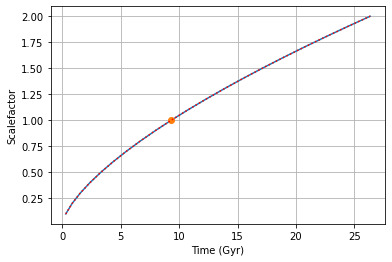

In [160]:
# First set up an array of times (initially all set to zero) into which we'll put our calculated times
t_Gyr = np.zeros(len(a_arr))  # len(a_arr) gives the length of the a_arr 

# Make a loop and do that integral for every final value of a (starting at a=0 every time)
for i,a_end in enumerate(a_arr): # enumerate adds an index to each value
    t_Hubble,uncert = integrate.quad(adotinv_flatmatter,0,a_end)
    t_Gyr[i] = t_Hubble/H0y

# It's good practise to compare it to the analytic calculation when available
t_analytic_fn = lambda x: 2*x*sqrt(x)/3
t_analytic_Gyr = t_analytic_fn(a_arr)/H0y 

fig, ax = plt.subplots()
ax.plot(t_Gyr,a_arr)
ax.plot(age_Gyr, 1.0,'o') # Put a dot at the current time
ax.plot(t_analytic_Gyr, a_arr,':',color='red')
ax.set_xlabel('Time (Gyr)')
ax.set_ylabel('Scalefactor')
ax.grid()

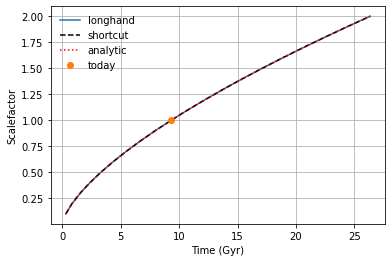

In [161]:
# You might be interested to know that python has some shortcuts.  The whole step above (except the plotting) can be done in one line:
t2_Gyr = np.array([integrate.quad(adotinv_flatmatter, 0, a_end)[0] for a_end in a_arr])/H0y

fig, ax = plt.subplots()
ax.plot(t_Gyr,a_arr,label='longhand') # Plot original from above
ax.plot(t2_Gyr,a_arr,'--',color='black',label='shortcut') # Plot new one-line calculation to show it is the same
ax.plot(t_analytic_Gyr, a_arr,':',color='red',label='analytic')
ax.plot(age_Gyr, 1.0,'o',label='today') # Put a dot at the current time
ax.set_xlabel('Time (Gyr)')
ax.set_ylabel('Scalefactor')
ax.grid()
ax.legend(frameon=False)

## 2.1 Lookback time - for you
It can be useful to normalise time to be 0 at the present day, then everything in the past is a negative time relative to today. You can do that by setting the lower limit of the integral to a=1.0, then all times are measured relative to the present time.

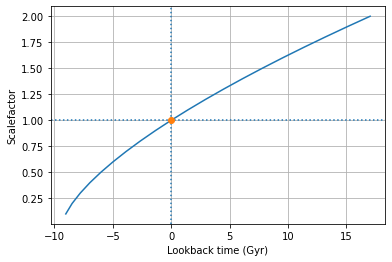

In [162]:
t_lookback_Gyr = t_analytic_Gyr - age_Gyr

fig, ax = plt.subplots()

ax.plot(t_lookback_Gyr,a_arr) 
ax.axvline(x=0,linestyle=':') # Plot some crosshairs 
ax.axhline(y=1,linestyle=':')
ax.plot(0.0, 1.0,'o') # Put a dot at the current time
ax.set_xlabel('Lookback time (Gyr)')
ax.set_ylabel('Scalefactor')
ax.grid()

## 2.2 Another way to calculate lookback time 
If you don't want to do the integral again (integrals can be computationally expensive) you can find the time closest to the present day by finding the index closest to a=1.0, and subtracting that time from all the times in the array. Give that a go...

age_today_Gyr=9.317443797011302


Text(0, 0.5, 'Scalefactor')

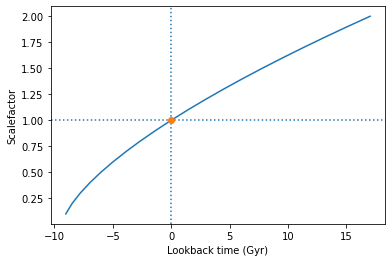

In [163]:
# First calculate the index corresponding to a=1.0.  (Find when |a-1.0| is minimum.  You could also do this by just redoing the integral from 0<a<1, but the way I've set it up above we know we have an a=1 in the array, so we can just find what we've already calculated.)
index_today = np.argmin(np.abs(a_arr - 1.0))

# Then find the time corresponding to that index  (note you do NOT have to do the integral again)
age_today_Gyr = t_analytic_Gyr[index_today]
print(f"{age_today_Gyr=}")

t2_lookback_Gyr = t_analytic_Gyr - age_today_Gyr

fig, ax = plt.subplots()
ax.plot(t2_lookback_Gyr,a_arr) 
ax.axvline(x=0,linestyle=':') # Plot some crosshairs 
ax.axhline(y=1,linestyle=':')
ax.plot(0.0, 1.0,'o') # Put a dot at the current time
ax.set_xlabel('Lookback time (Gyr)')
ax.set_ylabel('Scalefactor')

# Section 3. More complex models

In general Friedmann's equation gives,
$$
    H(a)^2 = \frac{\dot a^2}{a^2} = H_0^2 \sum_i \Omega_i a^{-3(1+w_i)}
$$
where the $\Omega_i$ correspond to different components of the universe (like matter) and $w_i$ are the corresponding equations of state.

Writing that out more fully we should consider matter density ΩM
(includes normal and dark matter and $w_M=0$); curvature $\Omega_K=1.0− \Omega_M−\Omega_\Lambda$ ($w_K=−1/3$); and cosmological constant $\Omega_\Lambda$ ($w_\Lambda =−1$).

Later we'll consider a more general dark energy $\Omega_x$
($w_x=$ unknown), and also add radiation density $\Omega_R$ ($w_R=1/3$).

Expanding the sum above for a universe with matter and a cosmological constant we get, 
$$
    \frac{\dot a}{a} = H_0 \left[ \Omega_M a^{-3} + \Omega_K a^{-2} + \Omega_\Lambda \right]^{1/2}
$$

Now let's integrate this more complex function.

In [164]:
# First write a function that takes as input a, Omega_M (om), and Omega_Lambda (ol) and outputs 1/adot
def adotinv(a,om,ol) -> float:
    """Return reciprocal of da/dt given a, Omega_M, Omega_Lambda."""
    ok = 1 - om - ol
    adot = a * sqrt(om * 1/(a**3) + ok * 1/(a**2) + ol)
    return 1.0/adot

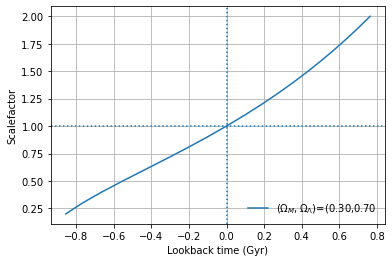

In [165]:
# Calculate for the universe we think we live in, with approximately matter density 0.3 and cosmological constant 0.7
om = 0.3
ol = 0.7

# Note that when you integrate something with more than one argument you pass it with args=(arg1,arg2) in the integrate function
# e.g. "integrate.quad(adotinv, lower_limit, uper_limit, args=(om,ol))""
t_today_Gyr, _ = integrate.quad(adotinv, 0, 1, args=(om,ol))
t_Gyr = np.array([integrate.quad(adotinv, 0, a_end, args=(om,ol))[0] for a_end in a_arr[1:]])
# slice [1:] to avoid division by zero error 
t_lookback_Gyr = t_Gyr - t_today_Gyr

# Plot this new model
fig, ax = plt.subplots()
# slice a_arr [1:] for same reason as t_Gyr slice
ax.plot(t_lookback_Gyr,a_arr[1:],label=f'($\Omega_M,\Omega_\Lambda$)=({om:.2f},{ol:.2f}')
ax.axvline(x=0,linestyle=':') # Plot some crosshairs 
ax.axhline(y=1,linestyle=':')
ax.set_xlabel('Lookback time (Gyr)')
ax.set_ylabel('Scalefactor')
ax.grid()
ax.legend(loc='lower right',frameon=False)

## 3.1 Your turn! Build your own universes!


Change the input matter density and cosmological constant:
- Can you make a universe that recollapses?
- What about one that has a bounce instead of a Big Bang in the past?
- What about one that always decelerates but never recollapses?
- Can you find any really weird behaviour? If so can you explain it?

In [166]:
# Redefine here for convenience.
astart = 0.1
astop = 2.1
astep = 0.01 # Make this finer to make the plot smoother
a_arr = np.arange(astart,astop,astep)

C:\Users\ciara\AppData\Local\Temp\ipykernel_26868\2635827092.py:5: RuntimeWarning: invalid value encountered in sqrt
  adot = a * sqrt(om * 1/(a**3) + ok * 1/(a**2) + ol)
C:\Users\ciara\AppData\Local\Temp\ipykernel_26868\1970353433.py:6: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  t_Gyr = np.array([integrate.quad(adotinv, 0, a_end, args=(om,ol))[0] for a_end in a_arr[1:]])


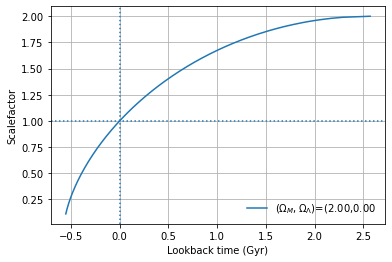

In [167]:
## RECOLLAPSES
om = 2
ol = 0 

t_today_Gyr, _ = integrate.quad(adotinv, 0, 1, args=(om,ol))
t_Gyr = np.array([integrate.quad(adotinv, 0, a_end, args=(om,ol))[0] for a_end in a_arr[1:]])
# slice [1:] to avoid division by zero error 
t_lookback_Gyr = t_Gyr - t_today_Gyr

# Plot this new model
fig, ax = plt.subplots()
# slice a_arr [1:] for same reason as t_Gyr slice
ax.plot(t_lookback_Gyr,a_arr[1:],label=f'($\Omega_M,\Omega_\Lambda$)=({om:.2f},{ol:.2f}')
ax.axvline(x=0,linestyle=':') # Plot some crosshairs 
ax.axhline(y=1,linestyle=':')
ax.set_xlabel('Lookback time (Gyr)')
ax.set_ylabel('Scalefactor')
ax.legend(loc='lower right',frameon=False)
ax.grid()

if not np.all(t_Gyr):
    print("Undefined values for given a, possibly recollapsing.")

# TODO not sure why this isn't giving us what we want??


To find the big bounce, we integrate from the minimum $a$ to maximum $a$. We need to find the minimum $a$. Recall that $dt= \frac{da}{\dot{a}} $ and
$$
    \dot a = H_0a \left[ \Omega_M a^{-3} + \Omega_K a^{-2} + \Omega_\Lambda \right]^{1/2}. 
$$
We want to find when $da/dt = 0$, so we set $\dot{a}=0$ in the above. We can rearrange this to be in the form of the roots of a depressed cubic $t^3 + pt + q$, namely
$$
    0 = \frac{\Omega_M}{\Omega_\Lambda} + \frac{(1 - \Omega_M)}{\Omega_\Lambda} a + a^3. 
$$
If $4p^3 + 27q^2 = 0$ and $p \neq 0$, then a depressed cubic has roots 
$$
    \frac{3q}{p},-\frac{3q}{2p},
$$
with the second root of multiplicity two. 

C:\Users\ciara\AppData\Local\Temp\ipykernel_26868\2635827092.py:5: RuntimeWarning: invalid value encountered in sqrt
  adot = a * sqrt(om * 1/(a**3) + ok * 1/(a**2) + ol)
C:\Users\ciara\AppData\Local\Temp\ipykernel_26868\2533177549.py:6: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  t_Gyr = np.array([integrate.quad(adotinv, 1, a_end, args=(om,ol))[0] for a_end in a_arr[1:]])


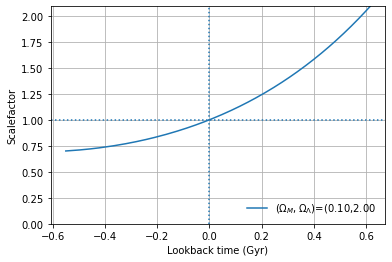

In [168]:
## BIG BOUNCE
om = 0.1
ol = 2

t_today_Gyr, _ = integrate.quad(adotinv, 1, 1, args=(om,ol))
t_Gyr = np.array([integrate.quad(adotinv, 1, a_end, args=(om,ol))[0] for a_end in a_arr[1:]])
# slice [1:] to avoid division by zero error 
t_lookback_Gyr = t_Gyr - t_today_Gyr

# Plot this new model
fig, ax = plt.subplots()
# slice a_arr [1:] for same reason as t_Gyr slice
ax.plot(t_lookback_Gyr,a_arr[1:],label=f'($\Omega_M,\Omega_\Lambda$)=({om:.2f},{ol:.2f}')
ax.axvline(x=0,linestyle=':') # Plot some crosshairs 
ax.axhline(y=1,linestyle=':')
ax.set_xlabel('Lookback time (Gyr)')
ax.set_ylabel('Scalefactor')
ax.set_ylim([0,np.max(a_arr)])
ax.legend(loc='lower right',frameon=False)
ax.grid()

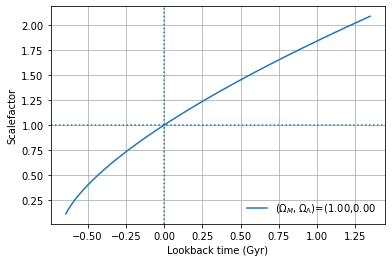

In [169]:
## DECELERATES
om = 1 
ol = 0 

t_today_Gyr, _ = integrate.quad(adotinv, 0, 1, args=(om,ol))
t_Gyr = np.array([integrate.quad(adotinv, 0, a_end, args=(om,ol))[0] for a_end in a_arr[1:]])
# slice [1:] to avoid division by zero error 
t_lookback_Gyr = t_Gyr - t_today_Gyr

# Plot this new model
fig, ax = plt.subplots()
# slice a_arr [1:] for same reason as t_Gyr slice
ax.plot(t_lookback_Gyr,a_arr[1:],label=f'($\Omega_M,\Omega_\Lambda$)=({om:.2f},{ol:.2f}')
ax.axvline(x=0,linestyle=':') # Plot some crosshairs 
ax.axhline(y=1,linestyle=':')
ax.set_xlabel('Lookback time (Gyr)')
ax.set_ylabel('Scalefactor')
ax.legend(loc='lower right',frameon=False)
ax.grid()


## 3.2

Now you can take that all and put it in a loop if you like, to compare different universes:

In [170]:
# Redefine here for convenience.
astart = 0.1
astop = 2.1
astep = 0.0001 # Make this finer to make the plot smoother
a_arr = np.arange(astart,astop,astep)

C:\Users\ciara\AppData\Local\Temp\ipykernel_26868\2635827092.py:6: RuntimeWarning: divide by zero encountered in double_scalars
  return 1.0/adot
C:\Users\ciara\AppData\Local\Temp\ipykernel_26868\2635827092.py:5: RuntimeWarning: invalid value encountered in sqrt
  adot = a * sqrt(om * 1/(a**3) + ok * 1/(a**2) + ol)
C:\Users\ciara\AppData\Local\Temp\ipykernel_26868\1518136927.py:9: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  t_Gyr = np.array([integrate.quad(adotinv, 1, a_end, args=(om,ol))[0] for a_end in a_arr[1:]])
C:\Users\ciara\AppData\Local\Temp\ipykernel_26868\1518136927.py:9: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, disc

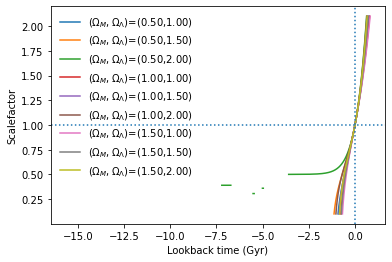

In [171]:
om_arr = np.arange(0.5,2,0.5)
ol_arr = np.arange(1,2.2,0.5)

fig, ax = plt.subplots()

for om in om_arr:
    for ol in ol_arr: 
        t_today_Gyr, _ = integrate.quad(adotinv, 1, 1, args=(om,ol))
        t_Gyr = np.array([integrate.quad(adotinv, 1, a_end, args=(om,ol))[0] for a_end in a_arr[1:]])
        # slice [1:] to avoid division by zero error 
        t_lookback_Gyr = t_Gyr - t_today_Gyr
        ax.plot(t_lookback_Gyr,a_arr[1:],label=f'($\Omega_M,\Omega_\Lambda$)=({om:.2f},{ol:.2f})')
    
ax.axvline(x=0,linestyle=':') # Plot some crosshairs 
ax.axhline(y=1,linestyle=':')
ax.set_xlabel('Lookback time (Gyr)')
ax.set_ylabel('Scalefactor')
ax.legend(frameon=False)

## 3.3 

Congratulations, you can now calculate how the expansion of the universe proceeds with time!

From here you can play with the input parameters. What happens when you:
- fix the cosmological constant and change matter density?
- add radiation?
- add dark energy with a different equation of state?

You might find it useful to make a more general adotinv function that takes into account all these possibilities.

In [172]:
def adotinv(a, om, ol, orad) -> float:
    """More general $1/\dot{a}$ for including dark energy and radiation."""
    ok = 1 - om - ol - orad
    adot = a * sqrt( orad / a**4  om / a**3 + ok / a**2 + ol)
    return 1.0/adot